# Exercício 3
![alt text]({D4B5FC8A-3E3A-4A56-865C-9812FE09FACF}.png)

![alt text]({D8B1AA91-146D-430C-AC36-3AF0FDBB4634}.png)

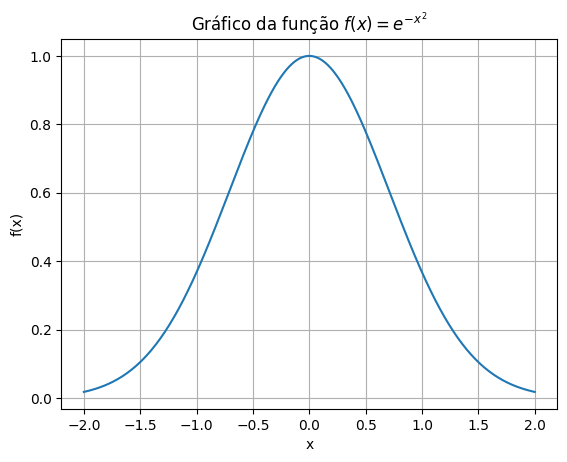

Integral de -1 a 1: 1.493648 (erro estimado: 1.66e-14)


In [16]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 400)
f = np.exp(-x**2)

plt.plot(x, f)
plt.title(r'Gráfico da função $f(x) = e^{-x^2}$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

from scipy.integrate import quad

resultado, erro = quad(lambda x: np.exp(-x**2), -1, 1)
print(f"Integral de -1 a 1: {resultado:.6f} (erro estimado: {erro:.2e})")


![alt text]({276448D2-37C1-4A37-9143-FEB276DBAD59}.png)

In [17]:
def f(x):
    return np.exp(-x**2)

N = 10
a = -1.0
b = 1.0

# Método dos trapézios
def trapezio(f, a, b, N):
    h = (b - a) / N
    s = 0.5*f(a) + 0.5*f(b)
    for k in range(1,N):
        s += f(a+k*h)
    return h * s

resultado_trapezio = trapezio(f, a, b, N)
print(f"Resultado do método dos trapézios: {resultado_trapezio:.6f}")

# Erro absoluto do método dos trapézios
erro_abs = abs(resultado - resultado_trapezio)
print(f"Erro absoluto: {erro_abs:.6f}")



Resultado do método dos trapézios: 1.488737
Erro absoluto: 0.004912


![alt text]({51D20A57-0060-4621-8CF3-75201531A234}.png)

In [18]:
# Regra de Simpson
def simpson(f, a, b, N):
    if N % 2 == 1:
        raise ValueError("N deve ser par")
    h = (b - a) / N
    s = f(a) + f(b)
    for k in range(1, N, 2):
        s += 4 * f(a + k * h)
    for k in range(2, N-1, 2):
        s += 2 * f(a + k * h)
    return (h / 3) * s

resultado_simpson = simpson(f, a, b, N)

# Erro absoluto da regra de Simpson
erro_simpson = abs(resultado - resultado_simpson)
print(f"Resultado da regra de Simpson: {resultado_simpson:.6f}")
print(f"Erro absoluto da regra de Simpson: {erro_simpson:.6f}")


Resultado da regra de Simpson: 1.493674
Erro absoluto da regra de Simpson: 0.000026


![alt text]({DC2170C3-B1D7-452E-8517-BF9F4162AF60}.png)

In [19]:
# N = 100
resultado_trapezio_100 = trapezio(f, a, b, 100)
resultado_simpson_100 = simpson(f, a, b, 100)
print(f"Resultado do método dos trapézios com N=100: {resultado_trapezio_100:.6f}")
print(f"Resultado da regra de Simpson com N=100: {resultado_simpson:.6f}")
# Erro absoluto com N=100
erro_abs_100 = abs(resultado - resultado_trapezio_100)
print(f"Erro absoluto do método dos trapézios com N=100: {erro_abs_100:.6f}")
erro_simpson_100 = abs(resultado - resultado_simpson_100)
print(f"Erro absoluto da regra de Simpson com N=100: {erro_simpson_100:.6f}")
print("-"*50)

# N = 1000
resultado_trapezio_1000 = trapezio(f, a, b, 1000)
resultado_simpson_1000 = simpson(f, a, b, 1000)     
print(f"Resultado do método dos trapézios com N=1000: {resultado_trapezio_1000:.6f}")
print(f"Resultado da regra de Simpson com N=1000: {resultado_simpson_1000:.6f}")
# Erro absoluto com N=1000
erro_abs_1000 = abs(resultado - resultado_trapezio_1000)
print(f"Erro absoluto do método dos trapézios com N=1000: {erro_abs_1000:.6f}")
erro_simpson_1000 = abs(resultado - resultado_simpson_1000)
print(f"Erro absoluto da regra de Simpson com N=1000: {erro_simpson_1000:.6f}")



Resultado do método dos trapézios com N=100: 1.493599
Resultado da regra de Simpson com N=100: 1.493674
Erro absoluto do método dos trapézios com N=100: 0.000049
Erro absoluto da regra de Simpson com N=100: 0.000000
--------------------------------------------------
Resultado do método dos trapézios com N=1000: 1.493648
Resultado da regra de Simpson com N=1000: 1.493648
Erro absoluto do método dos trapézios com N=1000: 0.000000
Erro absoluto da regra de Simpson com N=1000: 0.000000


![alt text]({A99EFEA3-F448-403D-9858-7CA3A84090A6}.png)

In [20]:
import numpy as np

def simpson_adaptativo(f, a, b, eps=1e-6):
    n = 2
    I_prev = None
    erro = float('inf')
    resultados = []

    while erro > eps:
        h = (b - a) / n
        # soma nos índices pares 
        even_sum = sum(f(a + k*h) for k in range(2, n, 2))
        S = (1/3) * (f(a) + f(b) + 2*even_sum)
        # soma nos índices ímpares 
        odd_sum = sum(f(a + k*h) for k in range(1, n, 2))
        T = (2/3) * odd_sum

        I = h * (S + 2*T)

        if I_prev is None:
            erro = float('inf')
            resultados.append((n, I, None))
        else:
            erro = abs((I - I_prev) / 15)
            resultados.append((n, I, erro))

        I_prev = I
        n *= 2

    return I, resultados


integral, dados = simpson_adaptativo(f, a, b, eps=1e-6)

print("Valor final da integral:", integral)
print("\nTabela:")
print("n\tIntegral\tErro")
for n, I, e in dados:
    if e is None:
        print(f"{n}\t{I:.10f}\t{'-'}")
    else:
        print(f"{n}\t{I:.10f}\t{e:.2e}")



Valor final da integral: 1.4936485148714607

Tabela:
n	Integral	Erro
2	1.5785862941	-
4	1.4943608578	5.62e-03
8	1.4937107596	4.33e-05
16	1.4936522411	3.90e-06
32	1.4936485149	2.48e-07


# Exercício 2
![alt text]({D7EE8AE7-396B-42C6-9084-9D50C60C1F10}.png)

![alt text]({46018223-EA1F-46F4-AE07-7D817F56D029}.png)

Máximo de f(x) no intervalo [0,4] encontrado em x = 1.0 com valor f(x) = 0.368


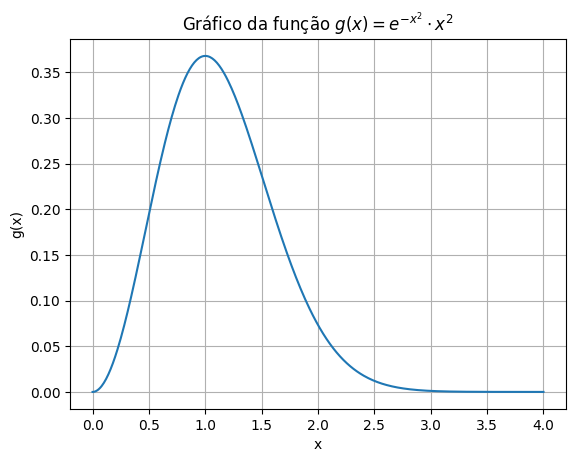

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

def f(x):
    return np.exp(-x**2) * x**2

x=np.linspace(0, 4, 400)


# Encontrar o máximo
result = minimize_scalar(lambda x: -f(x), bounds=(0, 4), method='bounded')
x_max = result.x
f_max = f(x_max)
print(f"Máximo de f(x) no intervalo [0,4] encontrado em x = {x_max:.1f} com valor f(x) = {f_max:.3f}")

f=f(x)
plt.plot(x, f)
plt.title(r'Gráfico da função $g(x) = e^{-x^2} \cdot x^2$')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.grid(True)
plt.show()



![alt text]({9D47C73E-1ACD-49FC-B360-E0ADCAD45E3C}.png)

In [22]:
from numpy import ones,copy,cos,tan,pi,linspace


def f(x):
    return np.exp(-x**2) * x**2

# Substituição para lidar com o infinito: t = x / (1 + x)
def transformed_f(t):
    x = t / (1 - t)  # Transformação inversa
    dx_dt = 1 / (1 - t)**2  # Derivada de x em relação a t
    return f(x) * dx_dt

# utilizando o arquivo fornecido pelo livro
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w


def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

def simpson(f, a, b, N):
    if N % 2 == 1:
        raise ValueError("N deve ser par")
    h = (b - a) / N
    s = f(a) + f(b)
    for k in range(1, N, 2):
        s += 4 * f(a + k * h)
    for k in range(2, N-1, 2):
        s += 2 * f(a + k * h)
    return (h / 3) * s


N = 50
a = 0.0
b = 0.999999 # limite superior ajustado para evitar uma divisão por 0

# Calculate the sample points and weights, then map them to the required integration domain
x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

# Perform the integration
s = 0.0
for k in range(N):
    s += wp[k]*transformed_f(xp[k])

print(f"Resultado da integração de 0 ao infinito com a quadratura Gaussiana: {s} \n")

resultado_simpson = simpson(transformed_f, a, b, N)
print(f"Resultado da integração de 0 ao infinito com a regra de Simpson: {resultado_simpson} \n")
# Erro absoluto da regra de Simpson
erro_simpson = abs(s - resultado_simpson)
print(f"Comparação da regra de Simpson com a quadratura Gaussiana: {erro_simpson} \n")

# valor de referencia
resultado, erro = quad(lambda x: np.exp(-x**2) * x**2, 0, np.inf)
print(f"Valor de referencia: {resultado:.6f} (erro estimado: {erro:.2e})")



Resultado da integração de 0 ao infinito com a quadratura Gaussiana: 0.44311346272785074 

Resultado da integração de 0 ao infinito com a regra de Simpson: 0.4431134432880828 

Comparação da regra de Simpson com a quadratura Gaussiana: 1.943976796203728e-08 

Valor de referencia: 0.443113 (erro estimado: 8.05e-09)


![alt text]({54043D8A-18A9-45A8-AF94-65F9F30F8747}.png)

In [23]:
N1 = 60  
N2 = 80  

# quadratura de Gauss
x1, w1 = gaussxwab(N1, a, b)
x2, w2 = gaussxwab(N2, a, b)

s1_gauss = sum(w1[k] * transformed_f(x1[k]) for k in range(N1))
s2_gauss = sum(w2[k] * transformed_f(x2[k]) for k in range(N2))

# estimativa de erro para quadratura de Gauss
erro_gauss = abs(s2_gauss - s1_gauss)

# regra de Simpson
s1_simpson = simpson(transformed_f, a, b, N1)
s2_simpson = simpson(transformed_f, a, b, N2)

# estimativa de erro para regra de Simpson
erro_simpson = abs(s2_simpson - s1_simpson)

# resultados
print(f"Quadratura de Gauss (N={N1}): {s1_gauss}")
print(f"Quadratura de Gauss (N={N2}): {s2_gauss}")
print(f"Erro estimado (Gauss): {erro_gauss:.6e}\n")

print(f"Regra de Simpson (N={N1}): {s1_simpson}")
print(f"Regra de Simpson (N={N2}): {s2_simpson}")
print(f"Erro estimado (Simpson): {erro_simpson:.6e}")

# método mais confiável
print("-"*50)
if erro_gauss < erro_simpson:
    print("Logo, a Quadratura de Gauss é mais confiável para esta função.")
else:
    print("Logo, a Regra de Simpson é mais confiável para esta função.")

Quadratura de Gauss (N=60): 0.4431134627263666
Quadratura de Gauss (N=80): 0.44311346272637914
Erro estimado (Gauss): 1.254552e-14

Regra de Simpson (N=60): 0.443113452745065
Regra de Simpson (N=80): 0.4431134594770194
Erro estimado (Simpson): 6.731954e-09
--------------------------------------------------
Logo, a Quadratura de Gauss é mais confiável para esta função.


# Exercício 3
![alt text]({32D1EBFA-4886-41D6-B22B-EC0E8C69AC9E}.png)

![alt text](image1.png)

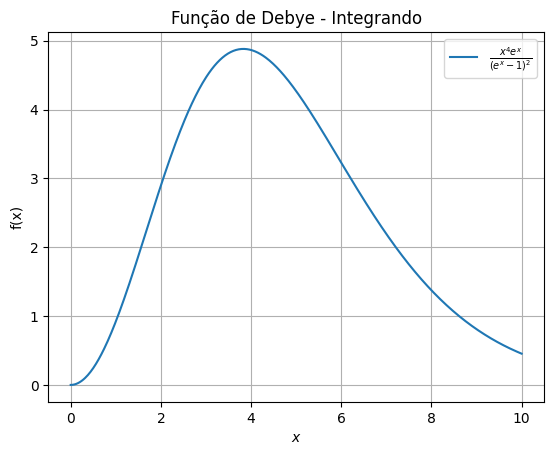

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Função de Debye - integrando
# f(x) = (x^4 * exp(x)) / (exp(x) - 1)^2
def f(x):
    # Evita divisão por zero numérico
    if x == 0:
        return 0.0
    return (x**4 * np.exp(x)) / (np.exp(x) - 1)**2

# Vetor de x
b = 10  # limite superior para visualizar
x_vals = np.linspace(0, b, 500)
y_vals = [f(x) for x in x_vals]

# Plot
plt.plot(x_vals, y_vals, label=r"$\frac{x^4 e^x}{(e^x-1)^2}$")
plt.xlabel(r"$x$")
plt.ylabel("f(x)")
plt.title("Função de Debye - Integrando")
plt.grid(True)
plt.legend()
plt.show()


![alt text](image3.png)


In [31]:
# 1 - quadratura de Gauss - codigo do livro 
from numpy import linspace, cos, pi, ones, copy, tan

def f(x):
    # Evita divisão por zero numérico
    if x == 0:
        return 0.0
    return (x**4 * np.exp(x)) / (np.exp(x) - 1)**2

# Parâmetros físicos
Theta_D = 300  # temperatura de Debye (K)
T = 50         # temperatura (K)
b = Theta_D / T 

def gaussxw(N):
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))
    epsilon = 1e-15
    delta = 1.0
    while delta > epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)
    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

N = 50
a = 0.0
b = Theta_D / T  # limite superior físico


# Pontos e pesos
xp, wp = gaussxwab(N, a, b)

# Integração
s = 0.0
for k in range(N):
    s += wp[k] * f(xp[k])

print(f"Integral de Debye (Quadratura Gaussiana N={N}) = {s:.10f}")


# 2 - método de romberg 
import numpy as np

# Função f(x) fornecida
def f(x):
    if x == 0:
        return 0.0
    return (x**4 * np.exp(x)) / (np.exp(x) - 1)**2

# Implementação da regra trapezoidal composta
def trapezio(f, a, b, n):
    h = (b - a) / n
    soma = 0.5 * (f(a) + f(b))
    for k in range(1, n):
        soma += f(a + k * h)
    return soma * h

# Implementação de Romberg manual
def romberg(f, a, b, max_iter=10, tol=1e-10):
    R = np.zeros((max_iter, max_iter))
    
    # Primeira estimativa: trapezoidal com 1 intervalo
    R[0, 0] = trapezio(f, a, b, 1)
    
    for i in range(1, max_iter):
        # Refinamento pela regra trapezoidal com o dobro de pontos
        R[i, 0] = trapezio(f, a, b, 2**i)
        
        # Extrapolação de Richardson
        for k in range(1, i+1):
            R[i, k] = (4**k * R[i, k-1] - R[i-1, k-1]) / (4**k - 1)
        
        # Critério de parada
        if abs(R[i, i] - R[i-1, i-1]) < tol:
            return R[i, i], R[:i+1, :i+1]
    
    return R[max_iter-1, max_iter-1], R

# Intervalo de integração
a = 0
b = Theta_D / T  

resultado, tabela = romberg(f, a, b)

print(f"Integral de Debye (método de Romberg) = {resultado:.10f}")
print("\nTabela de Romberg:")
for linha in tabela:
    if np.any(linha != 0):
        print("\t".join(f"{val:.10f}" if val != 0 else " " for val in linha))

# valor de referencia
from scipy.integrate import quad

resultado, erro = quad(lambda x: (x**4 * np.exp(x)) / (np.exp(x) - 1)**2, 0, b)
print("\nValor de referencia:")
print(f"{resultado:.6f} (erro estimado: {erro:.2e})")



Integral de Debye (Quadratura Gaussiana N=50) = 19.1229760161
Integral de Debye (método de Romberg) = 19.1229760161

Tabela de Romberg:
9.6853440896	 	 	 	 	 	 	 
18.2419363818	21.0941338125	 	 	 	 	 	 
18.9159164452	19.1405764663	19.0103393099	 	 	 	 	 
19.0716363398	19.1235429713	19.1224074050	19.1241862636	 	 	 	 
19.1101679115	19.1230117688	19.1229763553	19.1229853862	19.1229806769	 	 	 
19.1197756687	19.1229782544	19.1229760201	19.1229760148	19.1229759780	19.1229759734	 	 
19.1221760342	19.1229761560	19.1229760161	19.1229760160	19.1229760161	19.1229760161	19.1229760161	 
19.1227760271	19.1229760248	19.1229760161	19.1229760161	19.1229760161	19.1229760161	19.1229760161	19.1229760161

Valor de referencia:
19.122976 (erro estimado: 3.28e-12)


![alt text](image2.png)

In [ ]:
# Dados
N1 = 60
N2 = 80
a = 0.0

# Quadratura de Gauss
x1, w1 = gaussxwab(N1, a, b)
x2, w2 = gaussxwab(N2, a, b)
s1_gauss = sum(w1[k] * f(x1[k]) for k in range(N1))
s2_gauss = sum(w2[k] * f(x2[k]) for k in range(N2))
erro_gauss = abs(s2_gauss - s1_gauss)

# Romberg (retorna valor e tabela) - o método de Romberg ja faz nele mesmo a comparação de refinamentos sucessivos 
valor_romberg, tabela_romberg = romberg(f, a, b)


# Resultados
print(f"Quadratura de Gauss (N={N1}): {s1_gauss}")
print(f"Quadratura de Gauss (N={N2}): {s2_gauss}")
print(f"Erro estimado (Gauss): {erro_gauss:.6e}\n")

print(f"Romberg: {valor_romberg}")
print(f"Erro relativo (Romberg vs Gauss N={N2}): {abs(valor_romberg - s2_gauss):.6e}")

print("-"*50)
if erro_gauss < abs(valor_romberg - s2_gauss):
    print("Conclusão: Quadratura de Gauss foi mais precisa neste caso.")
else:
    print("Conclusão: Romberg foi mais precisa neste caso.")


Quadratura de Gauss (N=60): 19.122976016053162
Quadratura de Gauss (N=80): 19.12297601605316
Erro estimado (Gauss): 3.552714e-15

Romberg: 19.122976016053162
Erro relativo (Romberg vs Gauss N=80): 3.552714e-15
--------------------------------------------------
Conclusão: Romberg foi mais precisa neste caso.
